In [1]:
import random
import oommfc as oc
import discretisedfield as df
%matplotlib inline

# Zeeman energy

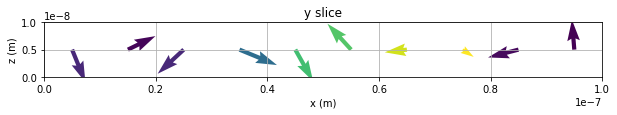

In [2]:
p1 = (0, 0, 0)
p2 = (100e-9, 10e-9, 10e-9)
cell = (10e-9, 10e-9, 10e-9)

mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)

def random_m(pos):
    mx = 2*random.random() - 1
    my = 2*random.random() - 1
    mz = 2*random.random() - 1
    return (mx, my, mz)

Ms = 8e6  # magnetisation saturation (A/m)
random_field = df.Field(mesh, value=random_m, norm=Ms)
random_field.plot_slice("y", 0);

2017/3/19 12:32: Calling OOMMF (zeeman_tutorial/zeeman_tutorial.mif) ... [1.0s]


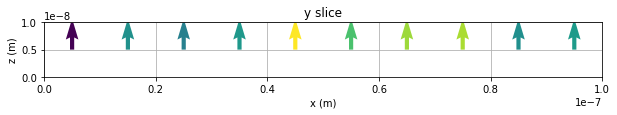

In [3]:
H = (0, 0, 5e6)  # external magnetic field (A/m)
zeeman = oc.Zeeman(H=H)

system = oc.System(name="zeeman_tutorial")

gamma = 2.211e5  # gyrotropic ration
alpha = 0.5  # Gilbert damping

system.dynamics = oc.Precession(gamma=gamma) + oc.Damping(alpha=alpha)
system.hamiltonian = zeeman
system.m = random_field

td = oc.TimeDriver()

td.drive(system, t=1e-10, n=1)

system.m.plot_slice("y", 0);